In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(
    "dataset/jena_climate_2009_2016.zip", compression="zip", low_memory=False
)
df.info(verbose=True, memory_usage=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420551 entries, 0 to 420550
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Date Time        420551 non-null  object 
 1   p (mbar)         420551 non-null  float64
 2   T (degC)         420551 non-null  float64
 3   Tpot (K)         420551 non-null  float64
 4   Tdew (degC)      420551 non-null  float64
 5   rh (%)           420551 non-null  float64
 6   VPmax (mbar)     420551 non-null  float64
 7   VPact (mbar)     420551 non-null  float64
 8   VPdef (mbar)     420551 non-null  float64
 9   sh (g/kg)        420551 non-null  float64
 10  H2OC (mmol/mol)  420551 non-null  float64
 11  rho (g/m**3)     420551 non-null  float64
 12  wv (m/s)         420551 non-null  float64
 13  max. wv (m/s)    420551 non-null  float64
 14  wd (deg)         420551 non-null  float64
dtypes: float64(14), object(1)
memory usage: 48.1+ MB


In [3]:
df.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


In [4]:
def set_time_index(
    df: pd.DataFrame, col_name: str, time_format: str = None
) -> pd.DataFrame:
    if col_name not in df.columns:
        raise Exception("Column {} is not in dataset: {}".format(col_name, df.columns))
    try:
        if time_format != None:
            df.index = pd.to_datetime(df[col_name], format=time_format)
        else:
            df.index = pd.to_datetime(df[col_name])
    except Exception as e:
        print("Unable to set {} as time index: {}".format(col_name, e))
    return df


df = set_time_index(df, "Date Time", time_format="%d.%m.%Y %H:%M:%S")
del df["Date Time"]

In [5]:
df.head()

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,
2009-01-01 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
2009-01-01 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2009-01-01 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
2009-01-01 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
2009-01-01 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


<AxesSubplot:xlabel='Date Time'>

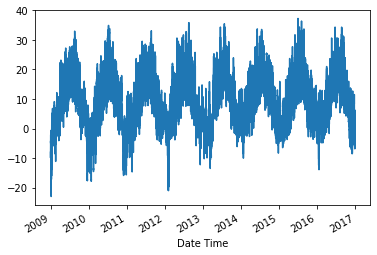

In [6]:
df["T (degC)"].plot()

In [7]:
df = df["T (degC)"].to_frame()
df.info(verbose=True, memory_usage=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 420551 entries, 2009-01-01 00:10:00 to 2017-01-01 00:00:00
Data columns (total 1 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   T (degC)  420551 non-null  float64
dtypes: float64(1)
memory usage: 6.4 MB


In [8]:
# interval-> Seconds to resample
def resample_df(df: pd.DataFrame, interval: int) -> pd.DataFrame:
    # Time interval is the number of seconds between each misuration
    time_interval = df.index.to_series().diff().dt.seconds.mode()[0]
    # These misuration break the rule, resample to `time_interval`
    df[df.index.to_series().diff().dt.seconds > time_interval]
    # Take only the integer part
    time_interval = str(int(time_interval))
    df = df.resample(time_interval + "S").mean().ffill().interpolate()
    assert (df.index.to_series().diff().dt.seconds > float(time_interval)).sum() == 0
    df = df.resample("{}".format(interval) + "S").mean().ffill().interpolate()
    assert (df.index.to_series().diff().dt.seconds > float(interval)).sum() == 0
    return df


import numpy as np


def normalize(values: np.ndarray):
    return (values - values.mean()) / np.std(values)

In [9]:
# Resample to 1 day
df = resample_df(df, 86400)
df["T (degC)"] = df["T (degC)"].astype("float16")
# df["T (degC)"] = normalize(df["T (degC)"].values)
df.info(verbose=True, memory_usage=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2923 entries, 2009-01-01 to 2017-01-01
Freq: 86400S
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   T (degC)  2923 non-null   float16
dtypes: float16(1)
memory usage: 28.5 KB


In [10]:
df.describe()

,T (degC)
count,2923.000000
mean,9.437500
std,7.835938
min,-16.453125
25%,3.811523
50%,9.710938
75%,15.417969
max,29.375000


# PROPHET FORECAST

In [11]:
propeth_df = df.copy().reset_index()

In [12]:
propeth_df.columns = ["ds", "y"]

In [13]:
x = propeth_df.copy()
x = x[:-7]

In [14]:
from prophet import Prophet

In [15]:
m = Prophet()
m.fit(x)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [16]:
# Create empty dataframe
future = m.make_future_dataframe(periods=7)

In [17]:
forecast = m.predict(future)

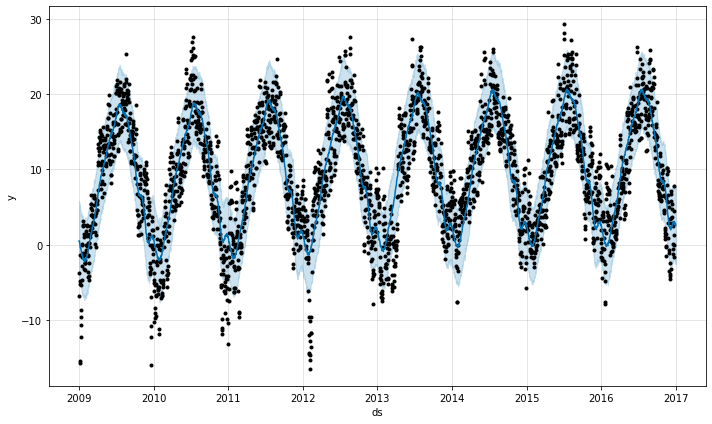

In [18]:
fig1 = m.plot(forecast)

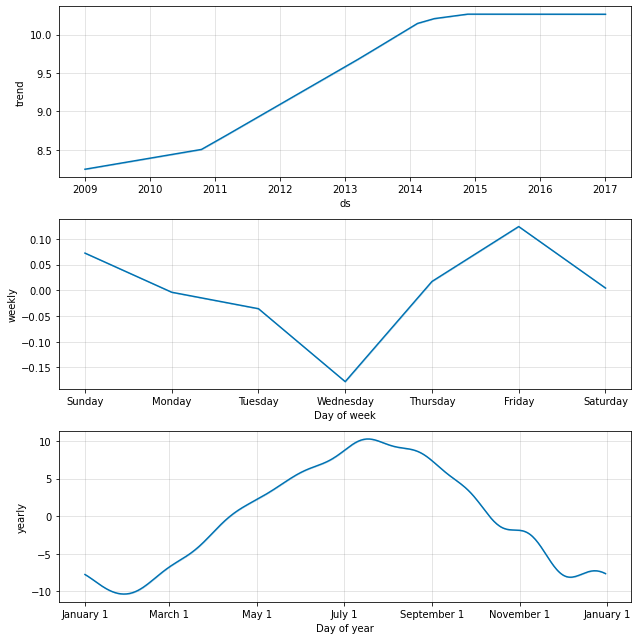

In [19]:
fig2 = m.plot_components(forecast)

In [20]:
from prophet.diagnostics import cross_validation, performance_metrics

# We know from the above graph that we have ~year seasonality
df_cv = cross_validation(m, initial="370 days", period="120 days", horizon="7 days")
df_p = performance_metrics(df_cv)

INFO:prophet:Making 22 forecasts with cutoffs between 2010-01-24 00:00:00 and 2016-12-18 00:00:00


  0%|          | 0/22 [00:00<?, ?it/s]

In [21]:
df_p

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,1 days,19.228217,4.384999,3.816849,0.665942,0.314939,0.663648,0.727273
1,2 days,22.229109,4.714776,3.657307,0.754760,0.333073,0.618331,0.772727
2,3 days,18.492411,4.300280,3.368212,0.793048,0.225955,0.637923,0.818182
3,4 days,15.095717,3.885321,3.044261,19.895005,0.254486,0.599473,0.818182
4,5 days,16.281444,4.035027,3.082205,1.542756,0.214467,0.602429,0.772727
5,6 days,13.421185,3.663494,2.814863,0.511354,0.240457,0.494921,0.818182
6,7 days,15.894500,3.986791,3.518801,1.340969,0.308180,0.650956,0.727273


In [22]:
real_values = list(propeth_df[-7:]["y"].values)
prophet_values = list(forecast[-7:]["yhat"].values)

In [23]:
display(propeth_df.tail(7))
display(forecast[-7:][["ds", "yhat"]])

,ds,y
2916,2016-12-26,7.527344
2917,2016-12-27,5.246094
2918,2016-12-28,4.886719
2919,2016-12-29,2.675781
2920,2016-12-30,-1.707031
2921,2016-12-31,-2.492188
2922,2017-01-01,-4.820312


,ds,yhat
2916,2016-12-26,2.954093
2917,2016-12-27,2.877983
2918,2016-12-28,2.678845
2919,2016-12-29,2.803323
2920,2016-12-30,2.827974
2921,2016-12-31,2.615642
2922,2017-01-01,2.580719


In [24]:
d = {"real_values": real_values, "prophet_values": prophet_values}

<AxesSubplot:>

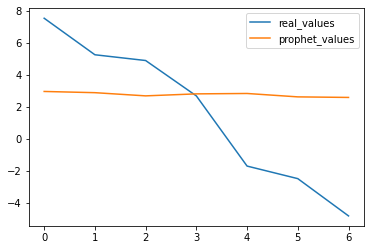

In [25]:
pd.DataFrame(d).plot()

In [26]:
import math

seasonality = 0
for key in m.seasonalities:
    seasonality = int(math.ceil(m.seasonalities[key]["period"]))
    break
seasonality

366

# TENSORFLOW

In [27]:
import tensorflow as tf
from tensorflow.keras import mixed_precision

policy = mixed_precision.Policy("mixed_float16")
mixed_precision.set_global_policy(policy)

INFO:tensorflow:Mixed precision compatibility check (mixed_float16): OK
Your GPU will likely run quickly with dtype policy mixed_float16 as it has compute capability of at least 7.0. Your GPU: NVIDIA GeForce RTX 2080 Ti, compute capability 7.5


In [28]:
numpy_x = x["y"].values
numpy_x.shape

(2916,)

In [29]:
# numpy_x = numpy_x.reshape(numpy_x.shape[0], 1)
numpy_x.shape

(2916,)

In [30]:
import numpy as np


# convert history into inputs and outputs
def to_supervised(dfTrain, varDelay, varOutput):
    # flatten data
    if len(dfTrain.shape) == 2:
        data = dfTrain.reshape((dfTrain.shape[0] * dfTrain.shape[1], 1))
    elif len(dfTrain.shape) == 3:
        data = dfTrain.reshape((dfTrain.shape[0] * dfTrain.shape[1], dfTrain.shape[2]))
    else:
        data = dfTrain
    X, y = list(), list()
    in_start = 0
    # step over the entire history one time step at a time
    for _ in range(len(data)):
        # define the end of the input sequence
        in_end = in_start + varDelay
        out_end = in_end + varOutput
        # ensure we have enough data for this instance
        if out_end <= len(data):
            x_input = data[in_start:in_end, 0]
            x_input = x_input.reshape((len(x_input), 1))
            X.append(x_input)
            y.append(data[in_end:out_end, 0])
        # move along one time step
        in_start += 1
    return np.array(X), np.array(y)


def split_sequence(sequence, n_steps_in, n_steps_out):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out
        # check if we are beyond the sequence
        if out_end_ix > len(sequence):
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix:out_end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [31]:
# Use 366 days as history, predict 7 days
history_window = seasonality
n_prediction = 7
df_x, df_y = split_sequence(numpy_x, history_window, n_prediction)
len(df_x)

2544

In [32]:
# Reshaping into n_example, timestamps, features
df_x = df_x.reshape(df_x.shape[0], df_x.shape[1], 1)
df_x.shape

(2544, 366, 1)

In [33]:
# Reshaping in n_example, timestamps
df_y = df_y.reshape(df_y.shape[0], df_y.shape[1])
df_y.shape

(2544, 7)

In [34]:
# Reduce memory usage for Low End graphic cards
df_x = np.float16(df_x)
df_y = np.float16(df_y)

In [35]:
model = tf.keras.Sequential(
    [
        tf.keras.layers.LSTM(
            512,
            input_shape=(df_x.shape[1], df_x.shape[2]),
            return_sequences=True,
        ),
        tf.keras.layers.LSTM(128),
        tf.keras.layers.Dense(df_y.shape[1]),
    ]
)
callback = tf.keras.callbacks.EarlyStopping(
    monitor="loss", patience=10, restore_best_weights=True
)
opt = tf.keras.optimizers.Adam()
model.compile(
    optimizer=opt,
    loss="mae",
    metrics=["mse"],
)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 366, 512)          1052672   
                                                                 
 lstm_1 (LSTM)               (None, 128)               328192    
                                                                 
 dense (Dense)               (None, 7)                 903       
                                                                 
Total params: 1,381,767
Trainable params: 1,381,767
Non-trainable params: 0
_________________________________________________________________


In [36]:
model.fit(df_x[:-1], df_y[:-1], epochs=1000, callbacks=[callback])

Epoch 1/1000
80/80 [==============================] - 9s 50ms/step - loss: 6.9481 - mse: 70.9953A:  - ETA: 1s - loss: 7 - ETA: 0s - loss: 7.040
Epoch 2/1000
80/80 [==============================] - 4s 47ms/step - loss: 5.4821 - mse: 46.0064
Epoch 3/1000
80/80 [==============================] - 4s 46ms/step - loss: 3.5799 - mse: 20.8929 0s - loss: 3.5931 - mse: - ETA: 0s - loss: 3.5921 - mse:
Epoch 4/1000
80/80 [==============================] - 4s 47ms/step - loss: 3.3185 - mse: 18.0236 3s - los - ETA: 0s - loss: 3.3224 - ms
Epoch 5/1000
80/80 [==============================] - 4s 46ms/step - loss: 3.2439 - mse: 17.2903
Epoch 6/1000
80/80 [==============================] - 4s 46ms/step - loss: 3.2036 - mse: 16.9575
Epoch 7/1000
80/80 [==============================] - 4s 46ms/step - loss: 3.1269 - mse: 16.0050
Epoch 8/1000
80/80 [==============================] - 4s 46ms/step - loss: 3.1316 - mse: 16.0067
Epoch 9/1000
80/80 [==============================] - 4s 46ms/step - loss: 3.1085

In [37]:
# Reshape input in order to have a single example with `history_window` timestamp
model_input = df_x[-1].reshape(1, history_window, 1)

In [38]:
model_prediction = model.predict(model_input).ravel()

In [39]:
d = {
    "real_values": df_y[-1],
    "model_values": model_prediction,
}

<AxesSubplot:>

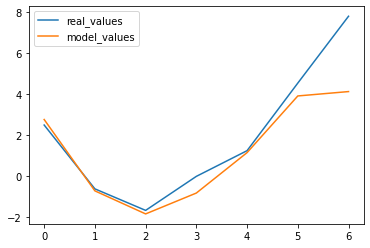

In [40]:
pd.DataFrame(d).plot()

In [41]:
model.save("my_model.h5")
model = tf.keras.models.load_model("my_model.h5")

In [42]:
# import shap

# # we use the first 100 training examples as our background dataset to integrate over
# explainer = shap.DeepExplainer(model, df_x[:history_window*3])

# # explain the first 10 predictions
# # explaining each prediction requires 2 * background dataset size runs
# shap_values = explainer.shap_values(df_x[:10])